In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/TBL/'

Mounted at /content/drive
/content/drive/My Drive/TBL


In [4]:
Base_entrenar=pd.read_csv("Base_modelo_08212023.csv", sep=',',encoding='latin1')
df=Base_entrenar[['DMY','Total_Boletas_DOI','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia']]

In [5]:
df['Total_Boletas_Harry'] = df['Total_Boletas_Harry'].fillna(0)
df['Total_Boletas_fait'] = df['Total_Boletas_fait'].fillna(0)
df['info_ventas_DOI_med'] = df['info_ventas_DOI_med'].fillna(0)
df['info_ventas_DOI_Cal'] = df['info_ventas_DOI_Cal'].fillna(0)
df['info_ventas_DOI_2017'] = df['info_ventas_DOI_2017'].fillna(0)
df['info_ventas_be'] = df['info_ventas_be'].fillna(0)


<ipython-input-5-c96e6627ec9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Boletas_Harry'] = df['Total_Boletas_Harry'].fillna(0)
<ipython-input-5-c96e6627ec9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Boletas_fait'] = df['Total_Boletas_fait'].fillna(0)
<ipython-input-5-c96e6627ec9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [5]:
df.describe()

,DMY,Total_Boletas_DOI,DAYS_BEFORE_EVENT,Total_Boletas_Harry,Total_Boletas_fait,info_ventas_DOI_med,info_ventas_DOI_Cal,info_ventas_DOI_2017,info_ventas_be,CDT_30,Dolar,Quncena,dia
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.023068e+07,373.300000,65.400000,37.233333,11.255556,240.533333,408.455556,275.077778,24.533333,0.132677,4151.456444,0.066667,4.033333
std,8.993241e+01,359.312873,26.005099,84.945991,46.362897,234.145744,743.895036,332.925009,34.144505,0.011274,151.638923,0.250841,1.996908
min,2.023052e+07,0.000000,21.000000,0.000000,0.000000,26.000000,19.000000,53.000000,0.000000,0.102232,3898.480000,0.000000,1.000000
25%,2.023061e+07,192.000000,43.250000,0.000000,0.000000,86.750000,87.250000,116.000000,0.000000,0.133007,4071.157500,0.000000,2.000000
50%,2.023071e+07,271.000000,65.500000,19.500000,0.000000,186.500000,134.500000,171.500000,10.500000,0.136968,4147.450000,0.000000,4.000000
75%,2.023073e+07,389.250000,87.750000,39.500000,8.000000,289.750000,336.000000,285.250000,35.500000,0.139360,4189.045000,0.000000,6.000000
max,2.023082e+07,2410.000000,109.000000,597.000000,430.000000,1511.000000,3991.000000,2524.000000,139.000000,0.142196,4528.670000,1.000000,7.000000


In [6]:
df.drop_duplicates(subset=['DMY'], keep=False,inplace=True)

<ipython-input-6-2bb154bbf816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['DMY'], keep=False,inplace=True)


In [7]:
df.head()

,DMY,Total_Boletas_DOI,DAYS_BEFORE_EVENT,Total_Boletas_Harry,Total_Boletas_fait,info_ventas_DOI_med,info_ventas_DOI_Cal,info_ventas_DOI_2017,info_ventas_be,CDT_30,Dolar,Quncena,dia
0,20230523,0,104,122.0,4.0,1511,842,1236,8.0,0.116950,4528.67,0,2
1,20230524,1049,109,94.0,7.0,462,338,437,25.0,0.102232,4501.81,0,3
2,20230525,375,108,6.0,5.0,272,224,220,18.0,0.107256,4448.93,0,4
3,20230526,483,107,597.0,1.0,180,159,373,8.0,0.104907,4470.83,0,5
4,20230527,255,106,142.0,3.0,154,142,277,4.0,0.104907,4461.66,0,6


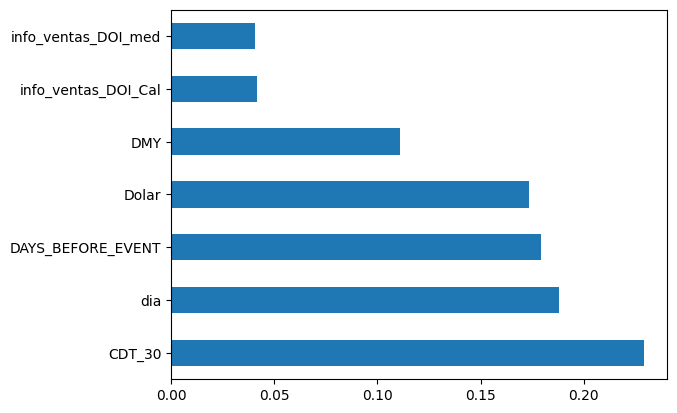

In [8]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor()
model.fit(df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia']],df[['Total_Boletas_DOI']])

(pd.Series(model.feature_importances_, index=df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia']].columns)
   .nlargest(7)
   .plot(kind='barh'));

In [9]:
df = df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia','Total_Boletas_DOI']]

In [10]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [29]:
for i in range(0, 50):
  indices = range(i-15, i)
  print(indices)

range(-15, 0)
range(-14, 1)
range(-13, 2)
range(-12, 3)
range(-11, 4)
range(-10, 5)
range(-9, 6)
range(-8, 7)
range(-7, 8)
range(-6, 9)
range(-5, 10)
range(-4, 11)
range(-3, 12)
range(-2, 13)
range(-1, 14)
range(0, 15)
range(1, 16)
range(2, 17)
range(3, 18)
range(4, 19)
range(5, 20)
range(6, 21)
range(7, 22)
range(8, 23)
range(9, 24)
range(10, 25)
range(11, 26)
range(12, 27)
range(13, 28)
range(14, 29)
range(15, 30)
range(16, 31)
range(17, 32)
range(18, 33)
range(19, 34)
range(20, 35)
range(21, 36)
range(22, 37)
range(23, 38)
range(24, 39)
range(25, 40)
range(26, 41)
range(27, 42)
range(28, 43)
range(29, 44)
range(30, 45)
range(31, 46)
range(32, 47)
range(33, 48)
range(34, 49)


In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []  # Lista para almacenar las ventanas históricas de entrada
    y = []  # Lista para almacenar los valores objetivo

    start = start + window  # Ajustar el punto de inicio para tomar en cuenta la ventana histórica

    if end is None:
        end = len(dataset) - horizon  # Si no se especifica el punto final, se calcula en función del horizonte

    for i in range(start, end):
        indices = range(i - window, i)  # Índices para extraer la ventana histórica
        X.append(dataset[indices])  # Agregar la ventana histórica a la lista X

        indicey = range(i + 1, i + 1 + horizon)  # Índices para extraer los valores objetivo en el futuro
        y.append(target[indicey])  # Agregar los valores objetivo a la lista y

    return np.array(X), np.array(y)  # Devolver los datos preparados como arreglos numpy


In [11]:
validate = df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia','Total_Boletas_DOI']].tail(10)
df.drop(df.tail(10).index,inplace=True)

<ipython-input-11-cc8eac35197c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.tail(10).index,inplace=True)


In [12]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
dataX = x_scaler.fit_transform(df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia','Total_Boletas_DOI']])
dataY = y_scaler.fit_transform(df[['Total_Boletas_DOI']])

In [24]:
len(dataX)

80

In [214]:
hist_window = 7
horizon = 15
TRAIN_SPLIT = 55
x_train_multi, y_train_multi = custom_ts_multi_data_prep(dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)

In [215]:
x_train_multi.shape

(48, 7, 13)

In [168]:
print ('Ventana única de la historia pasada')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])

Ventana única de la historia pasada
[[0.         0.93589744 0.20435511 0.00930233 1.         1.
  0.47875354 0.05755396 0.36827846 1.         0.         0.16666667
  0.        ]
 [0.00348432 1.         0.15745394 0.01627907 0.29360269 0.38760632
  0.15540267 0.17985612 0.         0.95737793 0.         0.33333333
  0.58899495]
 [0.00696864 0.98717949 0.01005025 0.01162791 0.16565657 0.2490887
  0.06758397 0.1294964  0.12571689 0.87346673 0.         0.5
  0.21055587]
 [0.01045296 0.97435897 1.         0.00232558 0.1037037  0.17010936
  0.12950223 0.05755396 0.06693316 0.90821816 0.         0.66666667
  0.27119596]
 [0.01393728 0.96153846 0.23785595 0.00697674 0.08619529 0.14945322
  0.09065156 0.02877698 0.06693316 0.89366699 0.         0.83333333
  0.14317799]
 [0.0174216  0.94871795 0.16247906 0.01860465 0.07676768 0.12515188
  0.08174828 0.10791367 0.06693316 0.89366699 0.         1.
  0.1078046 ]
 [0.02090592 0.93589744 0.10720268 0.01395349 0.03030303 0.09963548
  0.03763658 0.20143

In [170]:
BATCH_SIZE = 55
BUFFER_SIZE = 350

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [171]:
val_data_multi

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 7, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 15, 1), dtype=tf.float64, name=None))>

In [172]:
lstm_multi = tf.keras.models.Sequential()
lstm_multi.add(tf.keras.layers.LSTM(150,input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.LSTM(units=100,return_sequences=False)),
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [173]:
model_path = "LSTM_Multivariate.h5"

In [194]:
EVALUATION_INTERVAL = 150
EPOCHS = 100
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi, validation_steps=50,verbose =1,
                         callbacks =[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
                                     tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])


Epoch 1/100
150/150 [==============================] - 3s 23ms/step - loss: 1.1827e-04 - val_loss: 0.0548
Epoch 2/100
150/150 [==============================] - 3s 22ms/step - loss: 1.1800e-04 - val_loss: 0.0561
Epoch 3/100
150/150 [==============================] - 3s 22ms/step - loss: 1.1116e-04 - val_loss: 0.0556
Epoch 4/100
150/150 [==============================] - 4s 29ms/step - loss: 1.1823e-04 - val_loss: 0.0556
Epoch 5/100
150/150 [==============================] - 3s 21ms/step - loss: 1.1695e-04 - val_loss: 0.0548
Epoch 6/100
150/150 [==============================] - 3s 22ms/step - loss: 1.1352e-04 - val_loss: 0.0549
Epoch 7/100
150/150 [==============================] - 5s 36ms/step - loss: 1.1099e-04 - val_loss: 0.0553
Epoch 8/100
150/150 [==============================] - 4s 24ms/step - loss: 1.1568e-04 - val_loss: 0.0558
Epoch 9/100
150/150 [==============================] - 3s 22ms/step - loss: 1.1247e-04 - val_loss: 0.0552
Epoch 10/100
150/150 [========================

In [195]:
Trained_model = tf.keras.models.load_model(model_path)

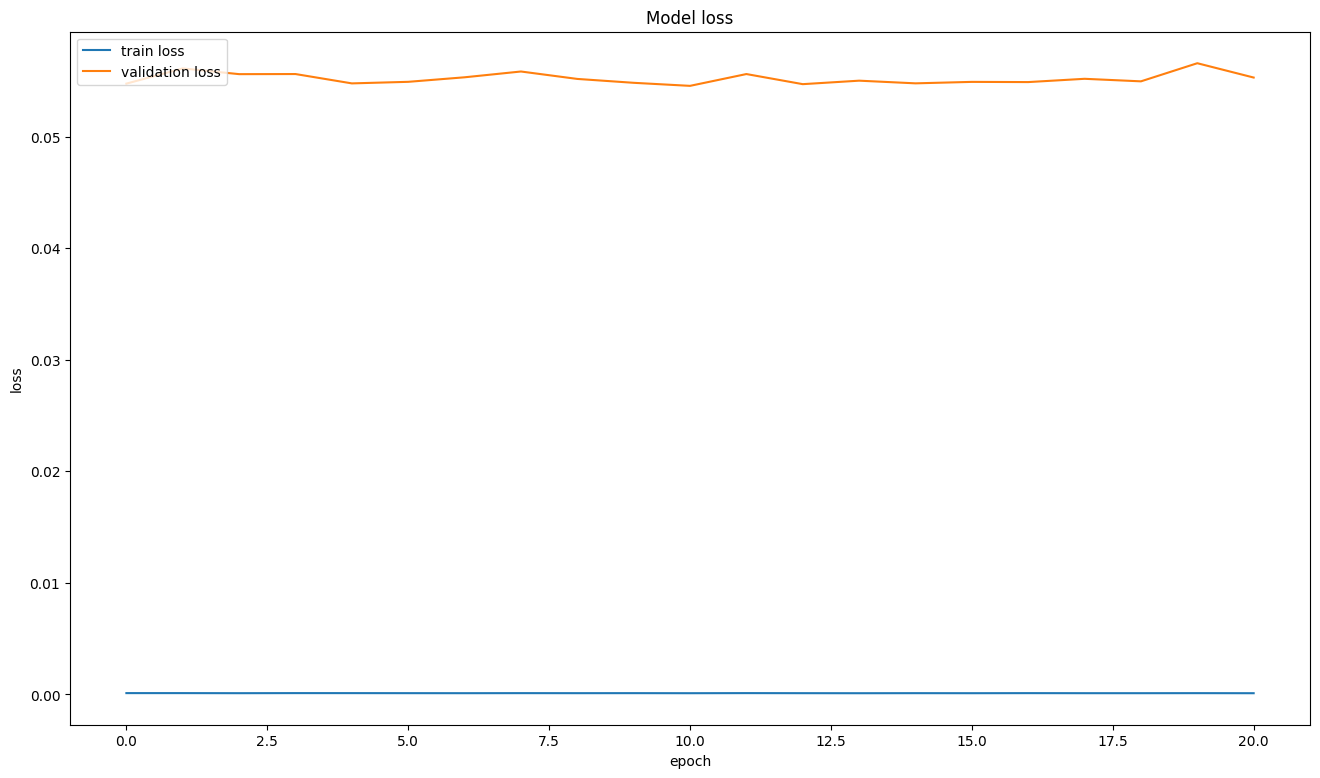

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [197]:

# Show the model architecture
Trained_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 7, 150)            98400     
                                                                 
 dropout_8 (Dropout)         (None, 7, 150)            0         
                                                                 
 lstm_15 (LSTM)              (None, 100)               100400    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 15)                1515      
                                                                 
Total params: 200,315
Trainable params: 200,315
Non-trainable params: 0
_________________________________________________________________


In [198]:
data_val = x_scaler.fit_transform(df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia','Total_Boletas_DOI']].tail(7))

In [199]:
data_val

array([[0.        , 1.        , 0.        , 0.        , 0.42690058,
        0.46403712, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.66666667, 0.14360771],
       [0.16666667, 0.83333333, 0.        , 0.        , 1.        ,
        0.43387471, 0.06687898, 0.        , 0.        , 0.40878558,
        0.        , 0.83333333, 0.16112084],
       [0.33333333, 0.66666667, 0.        , 0.        , 0.39766082,
        0.18097448, 0.07961783, 0.        , 0.        , 0.40878558,
        0.        , 1.        , 0.0910683 ],
       [0.5       , 0.5       , 0.        , 0.        , 0.04093567,
        0.        , 0.07643312, 0.        , 0.        , 0.40878558,
        0.        , 0.        , 0.09457093],
       [0.66666667, 0.33333333, 0.        , 0.        , 0.        ,
        0.06960557, 1.        , 0.        , 1.        , 0.40878558,
        0.        , 0.16666667, 0.        ],
       [0.83333333, 0.16666667, 0.        , 0.        , 0.16374269,
        0.37587007, 0.14649

In [200]:
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [201]:
data_val.shape[0]


7

In [202]:
Predicted_results = Trained_model.predict(val_rescaled)

1/1 [==============================] - 1s 609ms/step


In [203]:
Predicted_results

array([[0.872338  , 0.40940997, 0.1949192 , 0.15868409, 0.11414117,
        0.15386203, 0.15504122, 0.07146174, 0.1711254 , 0.12924321,
        0.15345547, 0.27756977, 0.18702027, 0.25954252, 0.29018658]],
      dtype=float32)

In [204]:
Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)

In [205]:

Predicted_results_Inv_trans

array([[1553.634  ,  729.1592 ,  347.1511 ,  282.61636,  203.28542,
         274.02826,  276.12842,  127.27337,  304.77432,  230.18216,
         273.3042 ,  494.35178,  333.0831 ,  462.24524,  516.8223 ]],
      dtype=float32)

In [206]:
from sklearn import metrics
def timeseries_evaluacion_metricas_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

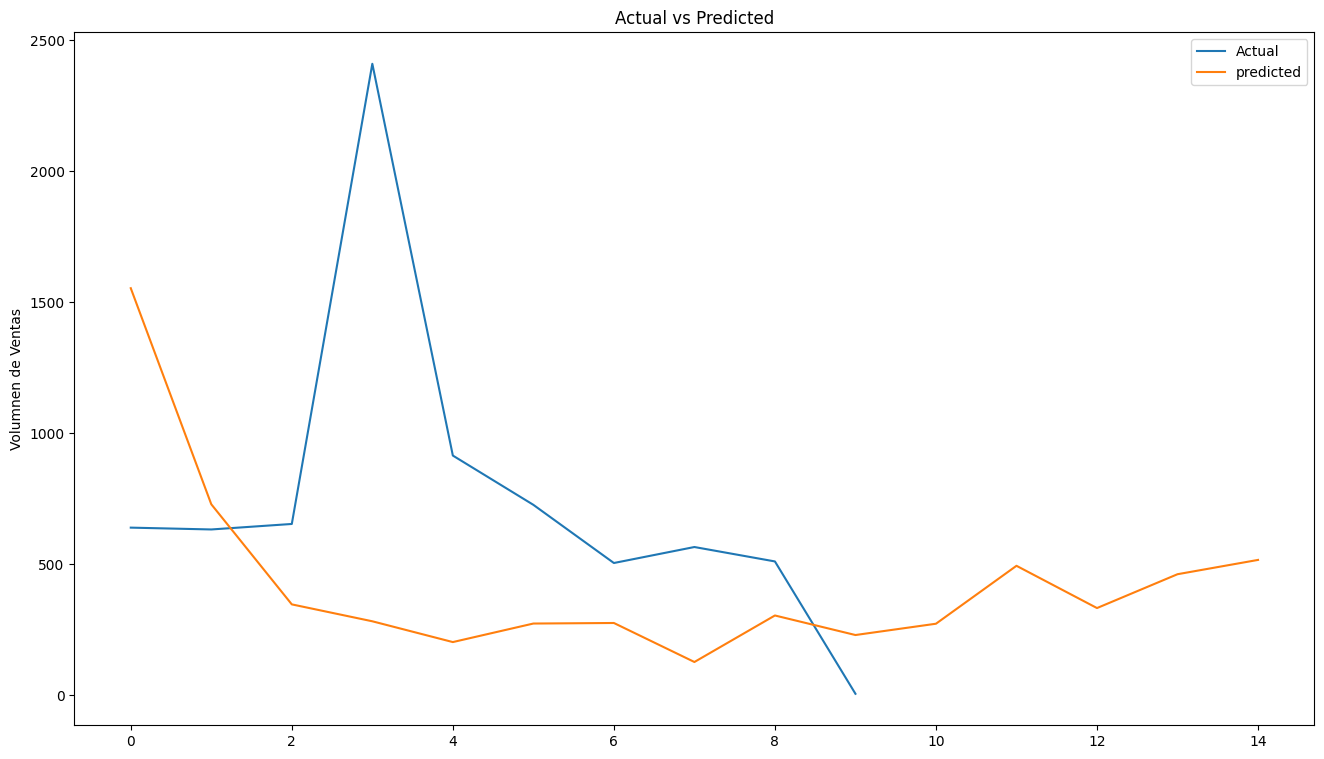

In [208]:
plt.plot( list(validate['Total_Boletas_DOI']))
plt.plot( list(Predicted_results_Inv_trans[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Volumnen de Ventas")
plt.legend(('Actual','predicted'))
plt.show()

In [8]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:00


# MODELO SARIMAX

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
#import plotly.offline as py
#import io
import pmdarima as pm

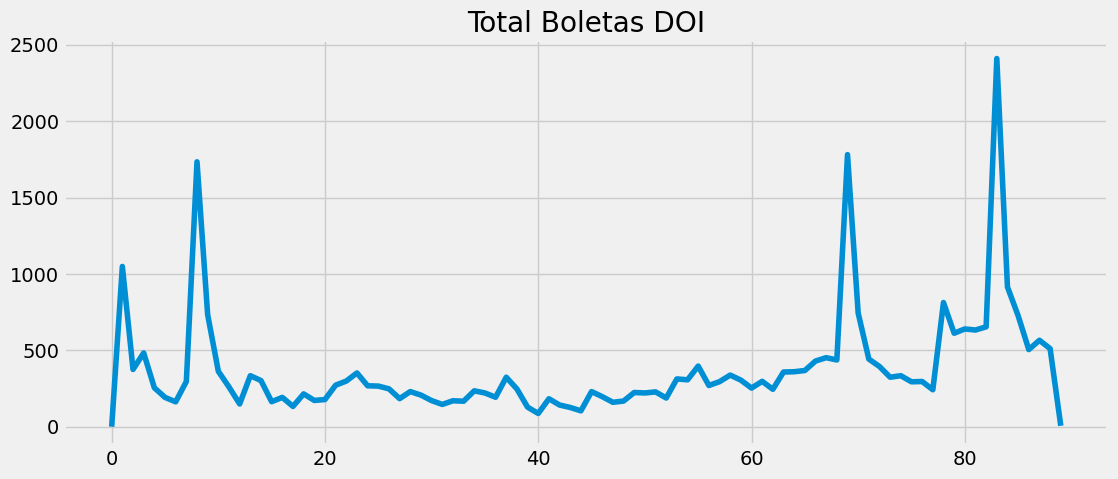

In [10]:
Boletas=df['Total_Boletas_DOI']
#isr=isrp.dropna()
Boletas.plot(figsize=(12,5))
plt.title('Total Boletas DOI')
plt.show()
#isr.head()

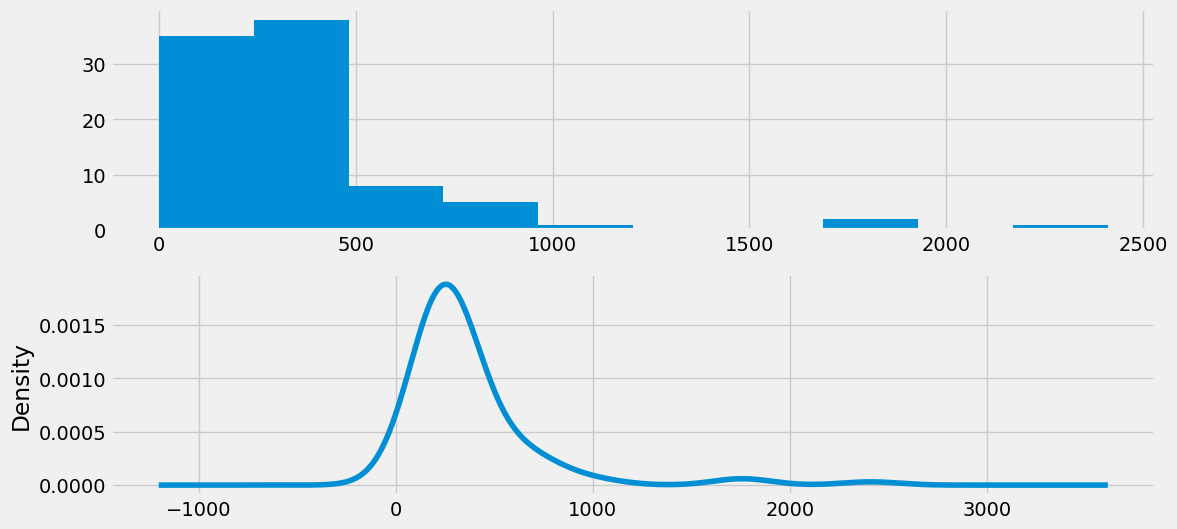

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))
Boletas.hist(ax=ax1)
Boletas.plot(kind='kde',ax=ax2)
plt.show()

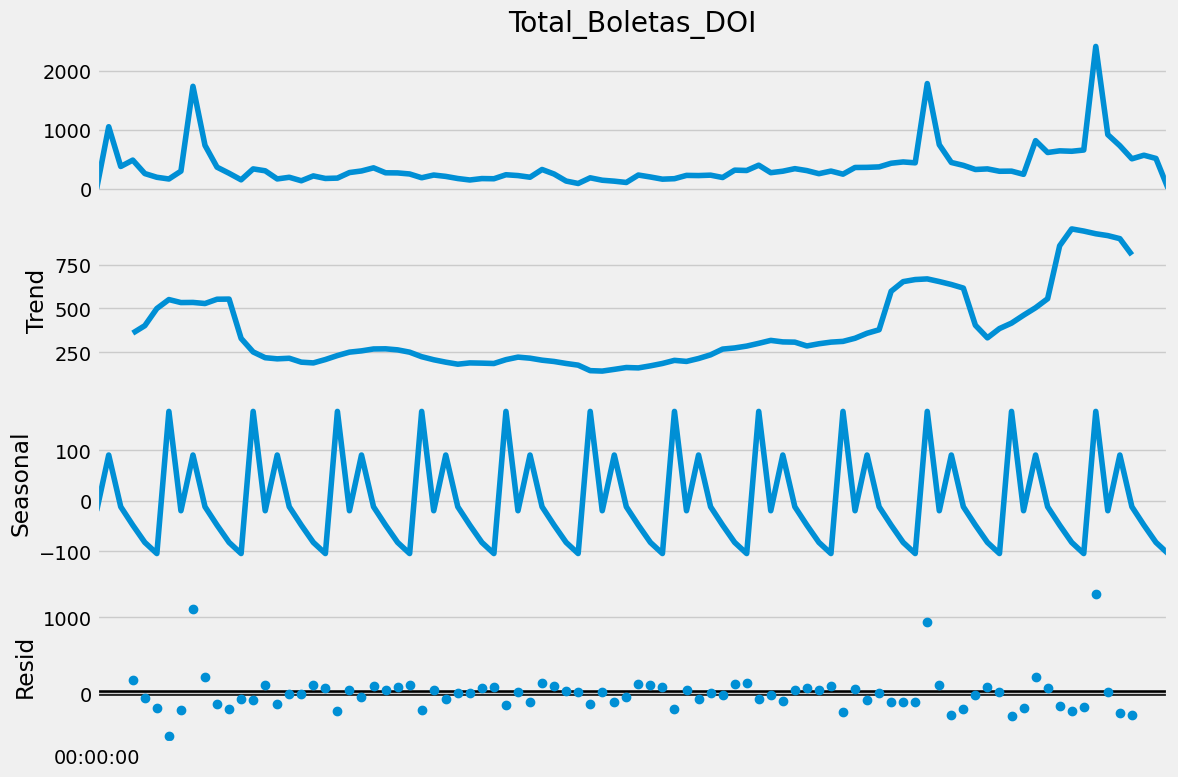

In [12]:
Boletas.index = pd.to_datetime(Boletas.index)
decomposition = seasonal_decompose(Boletas.dropna(),period=7, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

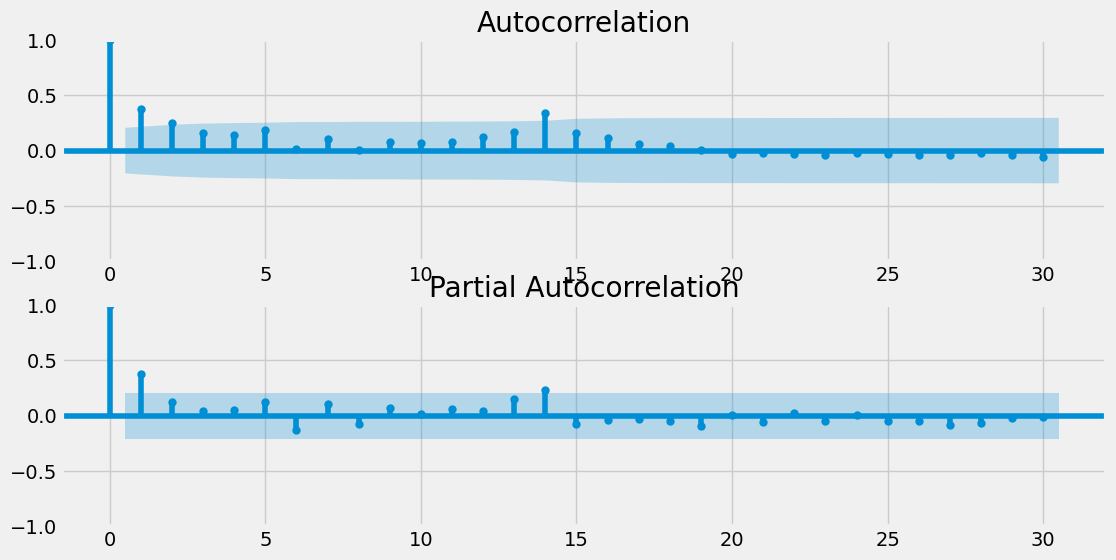

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6), sharex=False, sharey=False)
ax1 = plot_acf(Boletas, lags=30, ax=ax1)
ax2 = plot_pacf(Boletas, lags=30, ax=ax2)
plt.show()

In [14]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(Boletas.dropna())

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -4.526842
p-value                         0.000176
#Lags Used                      1.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [15]:
exogenas=df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia']]
#exogenas.drop(exogenas.tail(20).index,inplace=True)
exogenas.index = pd.to_datetime(exogenas.index)
exogenas.shape


(90, 12)

In [16]:
exogenas_x=df[['DMY','DAYS_BEFORE_EVENT','Total_Boletas_Harry','Total_Boletas_fait',
      'info_ventas_DOI_med','info_ventas_DOI_Cal','info_ventas_DOI_2017','info_ventas_be','CDT_30','Dolar','Quncena','dia']]
exogenas_x.drop(exogenas_x.head(70).index,inplace=True)
exogenas_x.index = pd.to_datetime(exogenas_x.index)
exogenas_x.shape

(20, 12)

In [17]:
model = pm.auto_arima(Boletas.dropna(),
                      exogenous=exogenas,
                      d=0, D=0,
                      seasonal=True, m=7, trend='c',
                      start_p=0, start_q=0, max_order=12, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1320.591, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1317.558, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1305.969, Time=1.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1309.910, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1317.558, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1305.868, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1306.975, Time=0.35 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1302.209, Time=1.45 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1283.772, Time=1.79 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1283.555, Time=1.67 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=1292.475, Time=1.26 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=1284.825, Time=2.01 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=1284.481, Time=3.63 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=1285.680, Time=3.75 sec
 ARIMA(2,0,1)(2,0,0)[7] intercept

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood                -636.777
Date:                           Tue, 22 Aug 2023   AIC                           1283.555
Time:                                   17:57:09   BIC                           1296.054
Sample:                               01-01-1970   HQIC                          1288.595
                                    - 01-01-1970                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     68.9515     44.084      1.564      0.118     -17.452     155.355
ar.L1          0.3432      0.198      1.732      0.083      -0.045       0.732
ar.S.L7        0.1104      0.048      2.304      0.021       0.017       0.204
ar.S.L14       0.6619      0.047     14.157      0.000       0.570       0.754
sigma2      7.408e+04   5575.336     13.287      0.000    6.32e+04     8.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               404.64
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.41
Prob(H) (two-sided):                  0.69   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model = SARIMAX(Boletas,order=(1,0,0),seasonal_order=(2,0,0,7),exog=exogenas)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                 Total_Boletas_DOI   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood                -632.842
Date:                           Tue, 22 Aug 2023   AIC                           1297.685
Time:                                   17:57:13   BIC                           1337.682
Sample:                               01-01-1970   HQIC                          1313.814
                                    - 01-01-1970                                         
Covariance Type:                             opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
DMY                      0.0005      0.000      4.521      0.000       0.000       0.001
DAYS_BEFORE_EVENT       -3.2646      3.745     -0.872      0.383     -10.605       4.076
Total_Boletas_Harry     -0.0937      1.320     -0.071      0.943      -2.681       2.494
Total_Boletas_fait      -0.7830      1.976     -0.396      0.692      -4.655       3.089
info_ventas_DOI_med     -0.1017      0.304     -0.334      0.738      -0.698       0.494
info_ventas_DOI_Cal      0.0834      0.108      0.773      0.440      -0.128       0.295
info_ventas_DOI_2017    -0.0106      0.279     -0.038      0.970      -0.557       0.536
info_ventas_be          -0.5287      2.020     -0.262      0.793      -4.487       3.430
CDT_30               -2.415e+04      0.015  -1.56e+06      0.000   -2.41e+04   -2.41e+04
Dolar                   -1.2399      0.532     -2.331      0.020      -2.282      -0.198
Quncena                 60.6824      0.106    570.582      0.000      60.474      60.891
dia                    -53.6003     34.813     -1.540      0.124    -121.832      14.631
ar.L1                    0.0993      0.217      0.457      0.648      -0.327       0.525
ar.S.L7                 -0.2484      0.124     -2.006      0.045      -0.491      -0.006
ar.S.L14                 0.4944      0.090      5.514      0.000       0.319       0.670
sigma2                8.374e+04      0.019   4.42e+06      0.000    8.37e+04    8.37e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               238.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             2.04
Prob(H) (two-sided):                  0.64   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+22. Standard errors may be unstable.
"""

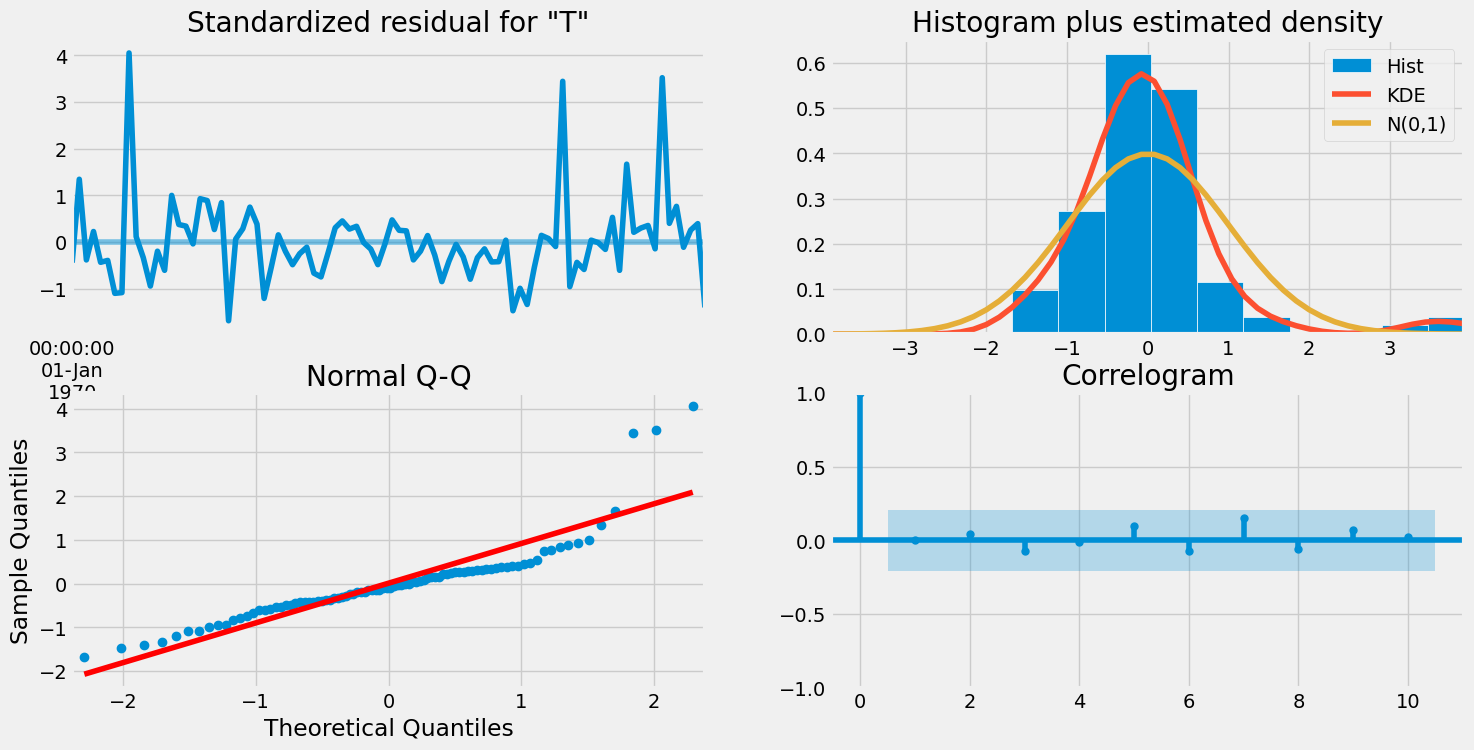

In [20]:
results.plot_diagnostics(figsize=(16, 8))
#plt.savefig('modeldiagnostics2')
plt.show()

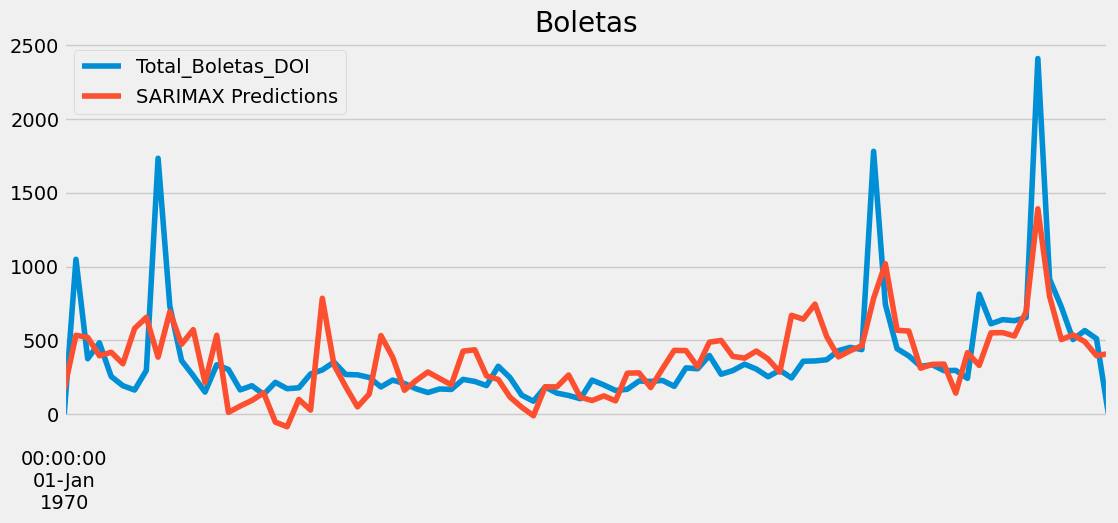

In [21]:
predictions = results.predict(start=0, end=len(Boletas)-1, dynamic=False, typ='levels', exog=exogenas).rename('SARIMAX Predictions')
title = 'Boletas'
ax = Boletas.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [22]:
r2_score(Boletas, predictions)
evaluation_results = pd.DataFrame({'r2_score': r2_score(Boletas, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(Boletas, predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(Boletas, predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - Boletas)/np.abs(Boletas))*100
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,0.394143,177.568593,77350.501686,inf


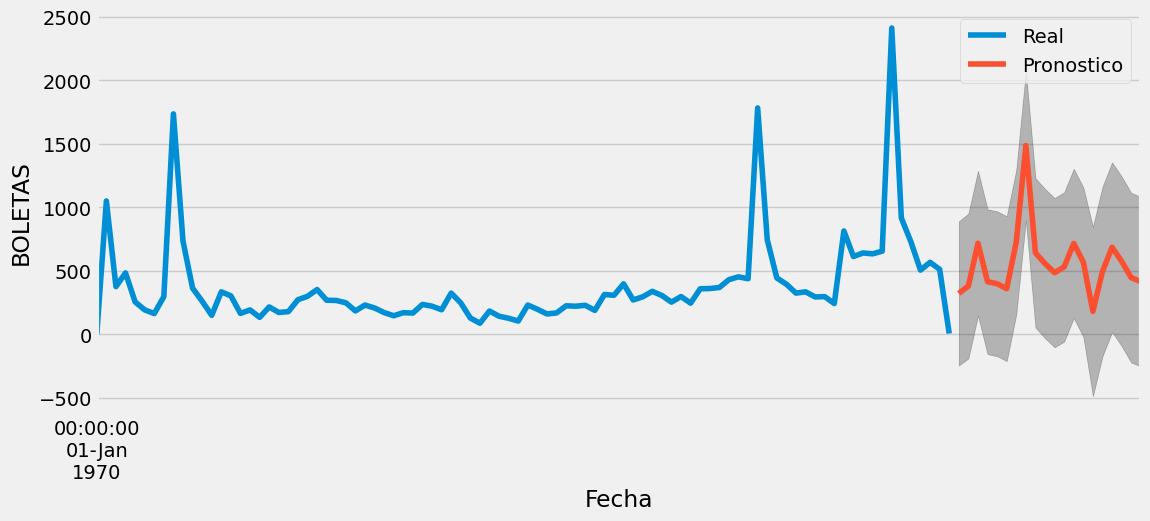

In [23]:
pred_f = results.get_forecast(steps=20, exog=exogenas_x)
pred_ci = pred_f.conf_int()
ax = Boletas.plot(label='Real', figsize=(12, 5))
pred_f.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('BOLETAS')
plt.legend()
plt.show()

In [96]:
x=pred_f.conf_int()
x.to_csv('Sarimax_Tu_BOLETA_int.csv')

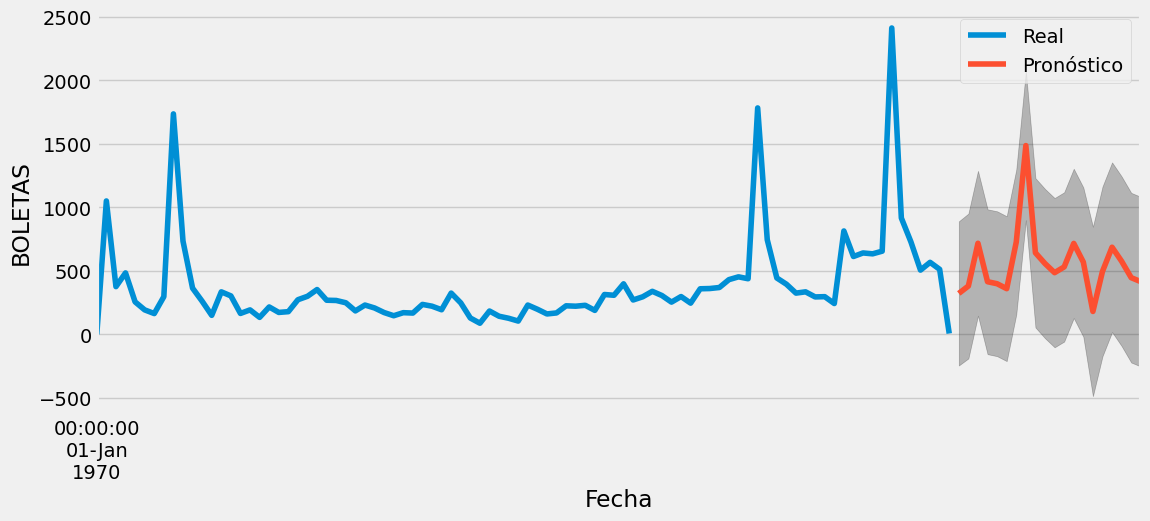

In [34]:
from scipy.stats import t

# Obtener el pronóstico y el intervalo de predicción
pred_f = results.get_forecast(steps=20, exog=exogenas_x)
pred_mean = pred_f.predicted_mean
pred_std = pred_f.se_mean

# Nivel de confianza del 90% (nivel de significancia del 10%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Grados de libertad para la distribución t de Student
degrees_of_freedom = results.df_resid

# Calcular el intervalo de predicción utilizando la distribución t de Student
t_multiplier = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
pi_lower = pred_mean - t_multiplier * pred_std
pi_upper = pred_mean + t_multiplier * pred_std

# Graficar el pronóstico con el nuevo intervalo de predicción
ax = Boletas.plot(label='Real', figsize=(12, 5))
pred_mean.plot(ax=ax, label='Pronóstico')
ax.fill_between(pred_mean.index, pi_lower, pi_upper, color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('BOLETAS')
plt.legend()
plt.show()

In [35]:
pi_lower


1970-01-01 00:00:00.000000090   -245.617887
1970-01-01 00:00:00.000000091   -190.082358
1970-01-01 00:00:00.000000092    146.151618
1970-01-01 00:00:00.000000093   -156.397127
1970-01-01 00:00:00.000000094   -172.296028
1970-01-01 00:00:00.000000095   -211.025968
1970-01-01 00:00:00.000000096    156.590941
1970-01-01 00:00:00.000000097    897.610201
1970-01-01 00:00:00.000000098     53.793028
1970-01-01 00:00:00.000000099    -30.955594
1970-01-01 00:00:00.000000100   -102.537273
1970-01-01 00:00:00.000000101    -57.241077
1970-01-01 00:00:00.000000102    127.820227
1970-01-01 00:00:00.000000103    -19.295412
1970-01-01 00:00:00.000000104   -486.969228
1970-01-01 00:00:00.000000105   -172.581120
1970-01-01 00:00:00.000000106     17.765465
1970-01-01 00:00:00.000000107    -92.967253
1970-01-01 00:00:00.000000108   -221.968724
1970-01-01 00:00:00.000000109   -253.295182
Freq: N, dtype: float64

In [36]:
pi_upper

1970-01-01 00:00:00.000000090     888.706770
1970-01-01 00:00:00.000000091     949.816421
1970-01-01 00:00:00.000000092    1286.105179
1970-01-01 00:00:00.000000093     983.556973
1970-01-01 00:00:00.000000094     967.658078
1970-01-01 00:00:00.000000095     928.928138
1970-01-01 00:00:00.000000096    1296.545047
1970-01-01 00:00:00.000000097    2071.882207
1970-01-01 00:00:00.000000098    1228.398154
1970-01-01 00:00:00.000000099    1143.652813
1970-01-01 00:00:00.000000100    1072.071166
1970-01-01 00:00:00.000000101    1117.367363
1970-01-01 00:00:00.000000102    1302.428667
1970-01-01 00:00:00.000000103    1155.313027
1970-01-01 00:00:00.000000104     846.323266
1970-01-01 00:00:00.000000105    1162.180922
1970-01-01 00:00:00.000000106    1352.541977
1970-01-01 00:00:00.000000107    1241.809402
1970-01-01 00:00:00.000000108    1112.807933
1970-01-01 00:00:00.000000109    1081.481475
Freq: N, dtype: float64